In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 


In [2]:
data = pd.read_csv('./FastagFraudDetection.csv')
data

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


In [3]:
print(data.isnull().sum())

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64


In [4]:
data.shape

(5000, 13)

In [5]:
data.Fraud_indicator.value_counts()

Fraud_indicator
Not Fraud    4017
Fraud         983
Name: count, dtype: int64

In [6]:
data[data.Fraud_indicator == 'Fraud'].isnull().sum()

Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64

In [7]:
data[data.Fraud_indicator == 'Not Fraud'].isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [8]:
data['Timestamp']= pd.to_datetime(data['Timestamp'])
data['Timestamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: Timestamp
Non-Null Count  Dtype         
--------------  -----         
5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 39.2 KB


C:\Users\Hetul\AppData\Local\Temp\ipykernel_21808\2985778930.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


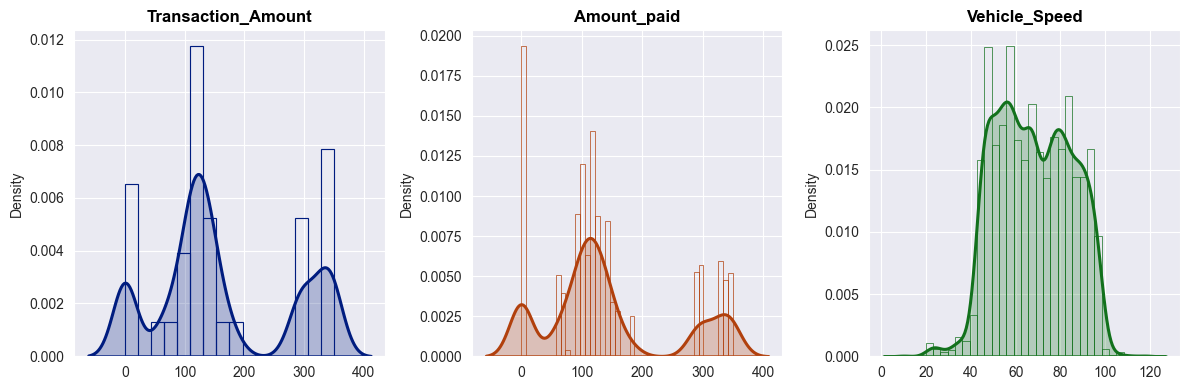

In [9]:
numerical_columns= ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']

sns.set_style('darkgrid')
colors= sns.color_palette(palette= 'dark', n_colors= len(numerical_columns))
fig, axs= plt.subplots(nrows= 1, ncols= 3, figsize=(12,4))
axs= axs.flat

for i,col in enumerate(numerical_columns):
    sns.kdeplot(data, x= col, color= colors[i], fill= True, linewidth= 2.2, ax= axs[i])
    sns.histplot(data, x=col, color= colors[i], fill= False, stat= 'density', ax=axs[i])
    axs[i].set_xlabel("")
    axs[i].set_title(col, color= 'black', fontweight= 'bold')
    
fig.tight_layout()
fig.show()

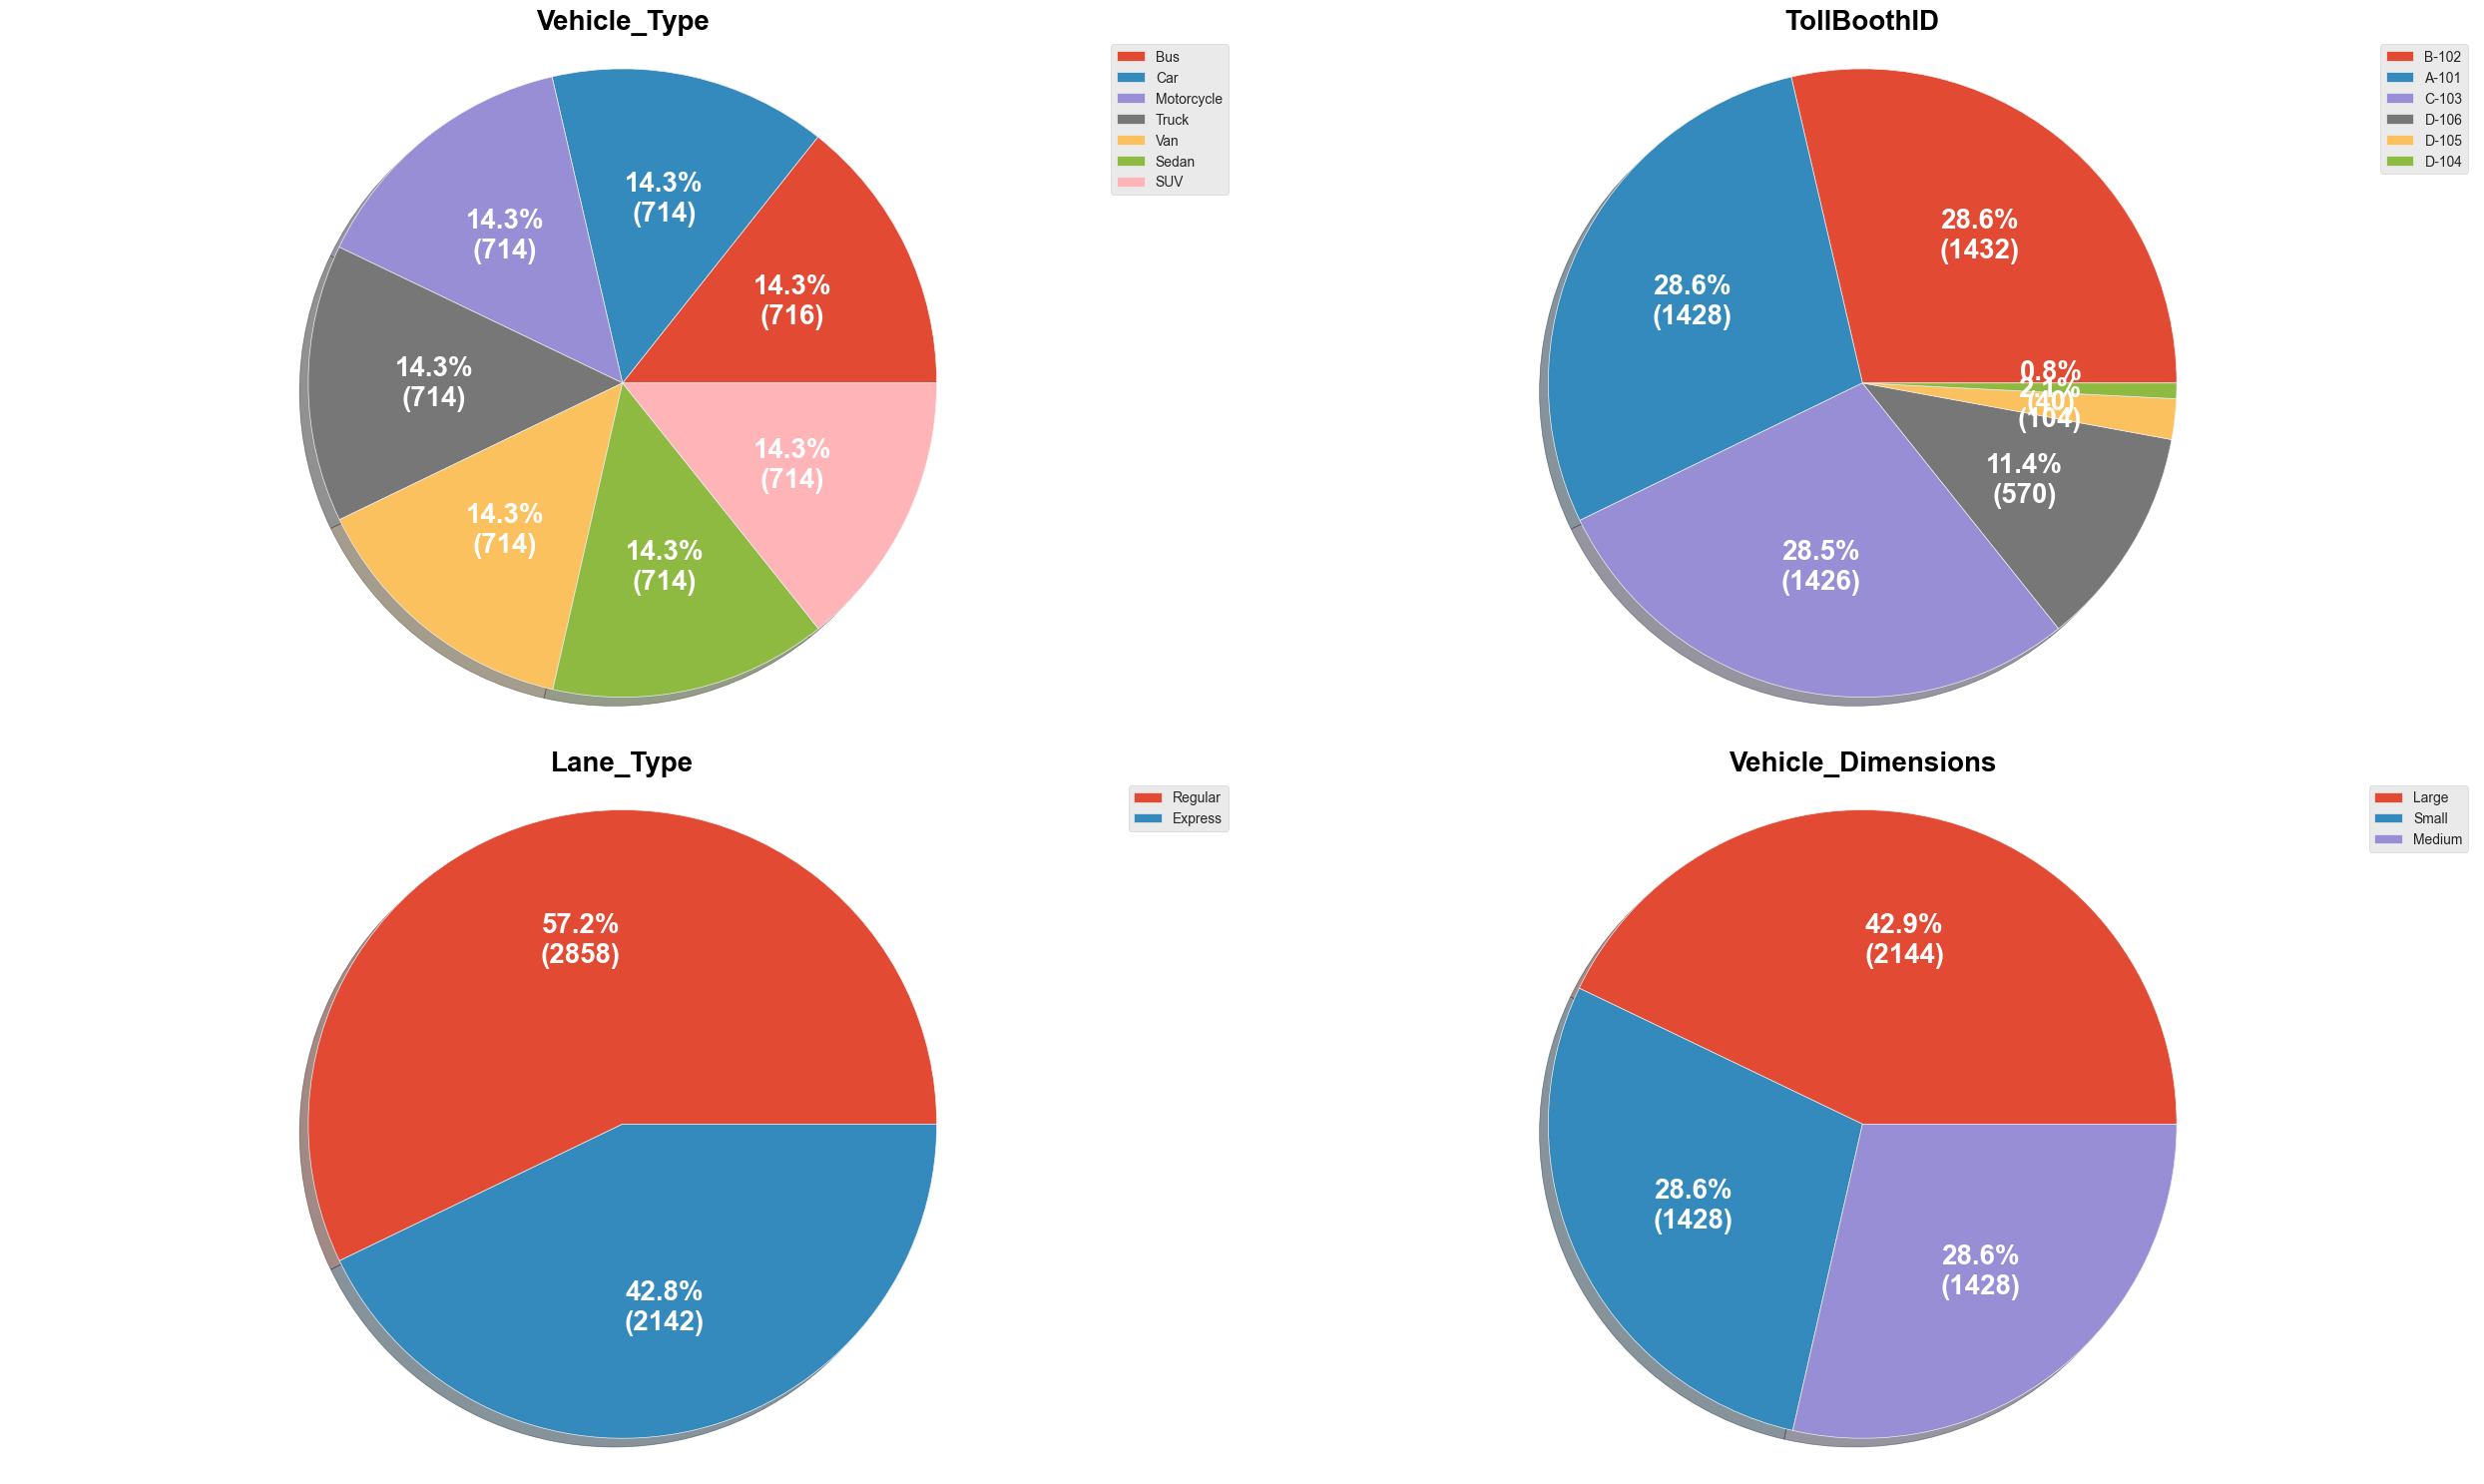

In [10]:
categorical_columns= ['Vehicle_Type', 'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions']

plt.style.use('ggplot')
def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}%\n({next(gen)})"

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25, 15))
ax = ax.flat

for i, col in enumerate(categorical_columns):
    df_class = data[col].value_counts().to_frame()
    labels = df_class.index
    values = df_class.iloc[:, 0].to_list()
    ax[i].pie(x=values, labels=labels, autopct=autopct_fun(values), shadow=True, textprops={'color': 'white', 'fontsize': 20, 'fontweight': 'bold'})
    ax[i].legend(labels)
    ax[i].set_title(col, fontsize=20, fontweight="bold", color="black")
    ax[i].axis('equal')
    ax[i].legend(loc='best')

fig.tight_layout()
plt.show()


In [11]:
data['Hour']= data['Timestamp'].dt.hour
data['DayOfWeek']= data["Timestamp"].dt.dayofweek
data['Month']= data['Timestamp'].dt.month

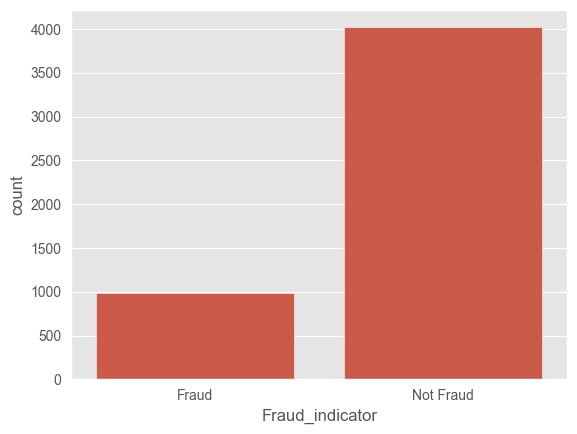

In [12]:
sns.countplot(x='Fraud_indicator', data=data)
plt.show()

In [13]:
categorical_columns = ['Vehicle_Type', 'FastagID', 'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Geographical_Location', 'Vehicle_Plate_Number', 'Fraud_indicator']
lb= LabelEncoder()

for col in categorical_columns:
    data[col]= lb.fit_transform(data[col].astype(str))

In [14]:
data.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Hour,DayOfWeek,Month
0,1,2023-01-06 11:20:00,0,2,0,0,0,350,120,3,65,1482,0,11,4,1
1,2,2023-01-07 14:55:00,1,9,1,1,2,120,100,3,78,3066,0,14,5,1
2,3,2023-01-08 18:25:00,2,4451,3,1,2,0,0,3,53,3663,1,18,6,1
3,4,2023-01-09 02:05:00,5,241,2,1,0,350,120,3,92,1498,0,2,0,1
4,5,2023-01-10 06:35:00,6,2860,1,0,1,140,100,3,60,2409,0,6,1,1


In [15]:
data=data.drop('Timestamp', axis=1)

In [16]:
data.head(2)

,Transaction_ID,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Hour,DayOfWeek,Month
0,1,0,2,0,0,0,350,120,3,65,1482,0,11,4,1
1,2,1,9,1,1,2,120,100,3,78,3066,0,14,5,1


In [17]:
data.shape

(5000, 15)

In [18]:
X= data.drop('Fraud_indicator', axis=1)
y= data['Fraud_indicator']

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=20)

In [19]:
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)


In [20]:
model= RandomForestClassifier(random_state=30)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=30)

In [21]:
y_predicted= model.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, y_predicted)
print("Accuracy:", accuracy)

Accuracy: 0.9872


In [23]:
precision = precision_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9844660194174757
Recall: 1.0
F1 Score: 0.9921722113502935


### Using LogisticRegression

In [24]:
model2 = LogisticRegression()

# Step 5: Fit the Model
model2.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model2.predict(X_test)

# Step 7: Evaluate the Model
accuracy1 = accuracy_score(y_test, y_predicted)

In [25]:
accuracy1

0.9872

In [26]:
imp= model.feature_importances_
feature_name= X.columns

#creating a dataframe for the important features
imp_features= pd.DataFrame({'Feature Name': feature_name,
                            'Importance': imp})

In [27]:
imp_features= imp_features.sort_values(by= 'Importance', ascending= False)
imp_features

,Feature Name,Importance
7,Amount_paid,0.419346
6,Transaction_Amount,0.158114
0,Transaction_ID,0.063379
3,TollBoothID,0.061070
5,Vehicle_Dimensions,0.052509
2,FastagID,0.047898
1,Vehicle_Type,0.045069
10,Vehicle_Plate_Number,0.036689
9,Vehicle_Speed,0.029105
11,Hour,0.025315
